In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import tensorflow as tf 
from tensorflow import keras 

from keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten

#GPU
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1.keras.backend import set_session


2022-11-22 22:39:46.950697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 22:39:47.037696: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 22:39:47.059587: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 22:39:47.435131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
#GPU
def limit_gpu_memory_for_process(frac):
    config = ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = frac
    config.gpu_options.allow_growth = True
    set_session(InteractiveSession(config=config))


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


In [4]:
input_shape = (150,150,3)

model = keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2022-11-22 22:39:49.379507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 22:39:49.400966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 22:39:49.401123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 22:39:49.401555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Question 1 and 2

- Q1 : The best loss function is `Binary Crossentropy`
- Q2 : 11,215,873 parameters

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.002,momentum=0.8) 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
batch_size = 20 
train_gen = ImageDataGenerator(rescale=1./255) 
train_ds = train_gen.flow_from_directory('./dino-dragon/train/',
            target_size=(150,150),batch_size=batch_size,class_mode='binary',shuffle=True)


test_gen = ImageDataGenerator(rescale=1./255) 
test_ds = test_gen.flow_from_directory('./dino-dragon/test/',
            target_size=(150,150),batch_size=batch_size,class_mode='binary',shuffle=True)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [8]:
data_batch, labels_batch = (t.shape for t in train_ds[0]) 
print(f"Batch size {data_batch}")
print(f"Labels size {labels_batch}")

Batch size (20, 150, 150, 3)
Labels size (20,)


In [9]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [10]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
)

Epoch 1/10


2022-11-22 22:39:51.515797: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


 1/80 [..............................] - ETA: 3:24 - loss: 0.6829 - accuracy: 0.5500

2022-11-22 22:39:52.832718: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


80/80 [==============================] - 5s 34ms/step - loss: 0.6837 - accuracy: 0.6117 - val_loss: 0.6476 - val_accuracy: 0.7208
Epoch 2/10
80/80 [==============================] - 3s 32ms/step - loss: 0.5620 - accuracy: 0.7359 - val_loss: 0.4787 - val_accuracy: 0.8249
Epoch 3/10
80/80 [==============================] - 3s 38ms/step - loss: 0.4456 - accuracy: 0.8005 - val_loss: 0.5404 - val_accuracy: 0.7157
Epoch 4/10
80/80 [==============================] - 3s 36ms/step - loss: 0.4056 - accuracy: 0.8319 - val_loss: 0.3940 - val_accuracy: 0.8198
Epoch 5/10
80/80 [==============================] - 3s 36ms/step - loss: 0.3600 - accuracy: 0.8494 - val_loss: 0.3581 - val_accuracy: 0.8579
Epoch 6/10
80/80 [==============================] - 3s 40ms/step - loss: 0.3202 - accuracy: 0.8745 - val_loss: 0.4890 - val_accuracy: 0.7741
Epoch 7/10
80/80 [==============================] - 3s 38ms/step - loss: 0.3154 - accuracy: 0.8733 - val_loss: 0.3449 - val_accuracy: 0.8553
Epoch 8/10
80/80 [======

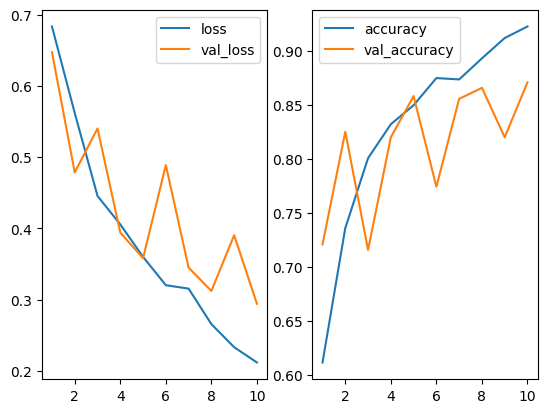

In [11]:
measured = ['loss','accuracy']
means = {k:np.mean(v).round(2) for k,v in history.history.items()}
medians = {k:np.median(v).round(2) for k,v in history.history.items()}
stds = {k:np.std(v).round(2) for k,v in history.history.items()}
fig,ax = plt.subplots(ncols=2)
x = np.arange(1,len(history.history['loss'])+1)
for i,m in enumerate(measured):
    for k in history.history.keys():
        if m in k:
            y = history.history[k]
            ax[i].plot(x,y,label=k)
    ax[i].legend()

In [14]:
medians

{'loss': 0.34, 'accuracy': 0.86, 'val_loss': 0.39, 'val_accuracy': 0.82}

In [15]:
stds

{'loss': 0.14, 'accuracy': 0.09, 'val_loss': 0.11, 'val_accuracy': 0.05}

# Data Augmentation



In [16]:
batch_size = 20 
train_gen = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            ) 
                            
train_ds = train_gen.flow_from_directory('./dino-dragon/train/',
            target_size=(150,150),batch_size=batch_size,class_mode='binary',shuffle=True)


Found 1594 images belonging to 2 classes.


In [17]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
)

Epoch 1/10
80/80 [==============================] - 6s 77ms/step - loss: 0.4480 - accuracy: 0.7961 - val_loss: 0.5362 - val_accuracy: 0.7386
Epoch 2/10
80/80 [==============================] - 7s 88ms/step - loss: 0.4567 - accuracy: 0.7848 - val_loss: 0.2851 - val_accuracy: 0.8909
Epoch 3/10
80/80 [==============================] - 8s 103ms/step - loss: 0.3898 - accuracy: 0.8250 - val_loss: 0.4414 - val_accuracy: 0.8020
Epoch 4/10
80/80 [==============================] - 8s 98ms/step - loss: 0.3853 - accuracy: 0.8287 - val_loss: 0.3428 - val_accuracy: 0.8401
Epoch 5/10
80/80 [==============================] - 7s 91ms/step - loss: 0.3870 - accuracy: 0.8250 - val_loss: 0.2957 - val_accuracy: 0.8756
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3885 - accuracy: 0.8300 - val_loss: 0.4430 - val_accuracy: 0.8046
Epoch 7/10
80/80 [==============================] - 8s 99ms/step - loss: 0.3757 - accuracy: 0.8375 - val_loss: 0.5498 - val_accuracy: 0.7640
Epoch 8/10


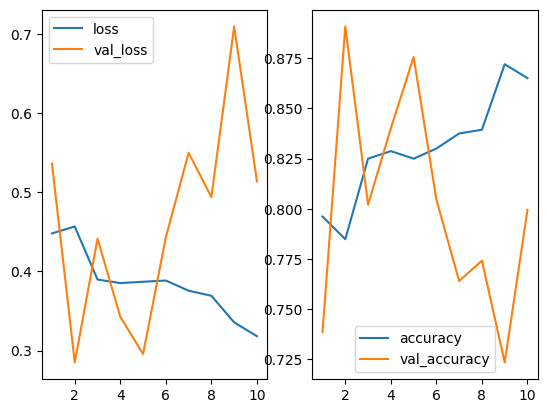

In [18]:
measured = ['loss','accuracy']
fig,ax = plt.subplots(ncols=2)
x = np.arange(1,len(history.history['loss'])+1)
for i,m in enumerate(measured):
    for k in history.history.keys():
        if m in k:
            y = history.history[k]
            ax[i].plot(x,y,label=k)
    ax[i].legend()

In [19]:
val_loss = history.history['val_loss']
mean_val_loss = np.mean(val_loss)
mean_val_loss

0.46105804443359377

In [20]:
mean_val_accu = history.history['val_accuracy']
mean_mean_val_accu = np.mean(mean_val_accu[-5:])
mean_mean_val_accu

0.7730964422225952